In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pip install ucimlrepo



UCI Machine Learning Repository是一個知名的公開數據庫，旨在為機器學習社區提供大量的數據集，以便於進行學術研究和教育。該庫由加利福尼亞大學爾灣分校（University of California, Irvine）的機器學習和智慧系統實驗室維護，自1987年以來一直是機器學習和數據探勘領域研究人員的重要資源。

UCI Machine Learning Repository提供各種類型的數據集，這些數據集覆蓋從財經、醫療、文本、影像到生物信息學等多個領域。這些數據集通常用於支持機器學習模型的開發和測試，包括但不限於分類、回歸、聚類以及其他數據探勘任務。

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)
print(X)

#print(X_1)

print(y)



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [8]:
from sklearn.preprocessing import LabelEncoder

# 創建 LabelEncoder 物件
label_encoder = LabelEncoder()

# 將類別標籤轉換為數字分類
numeric_labels = label_encoder.fit_transform(y)

print(numeric_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
!pip install matplotlib

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


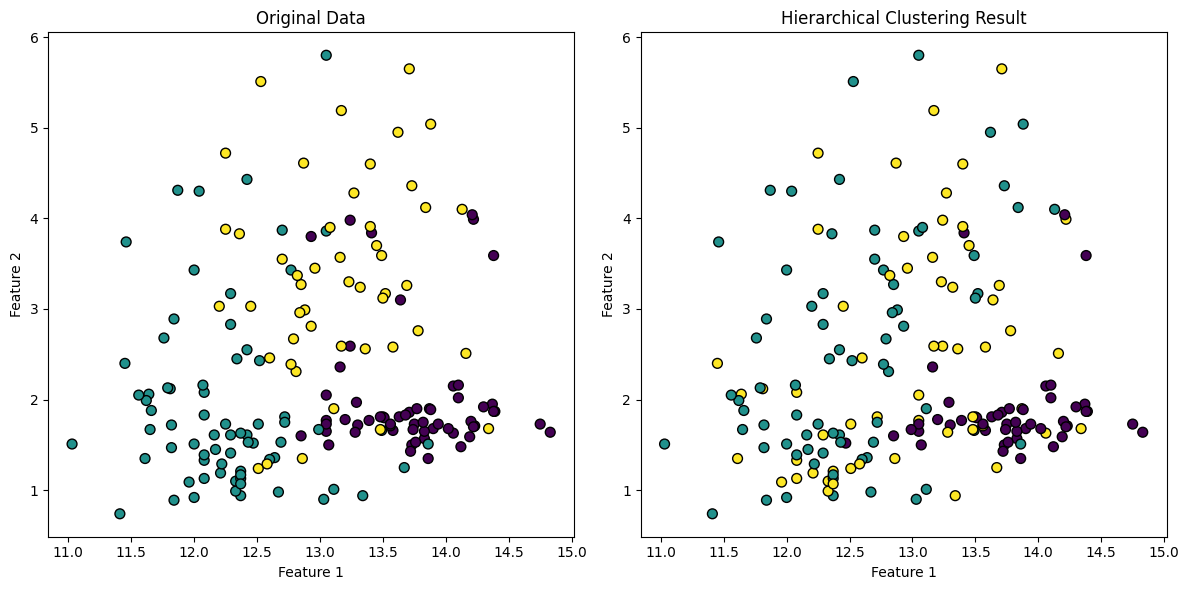

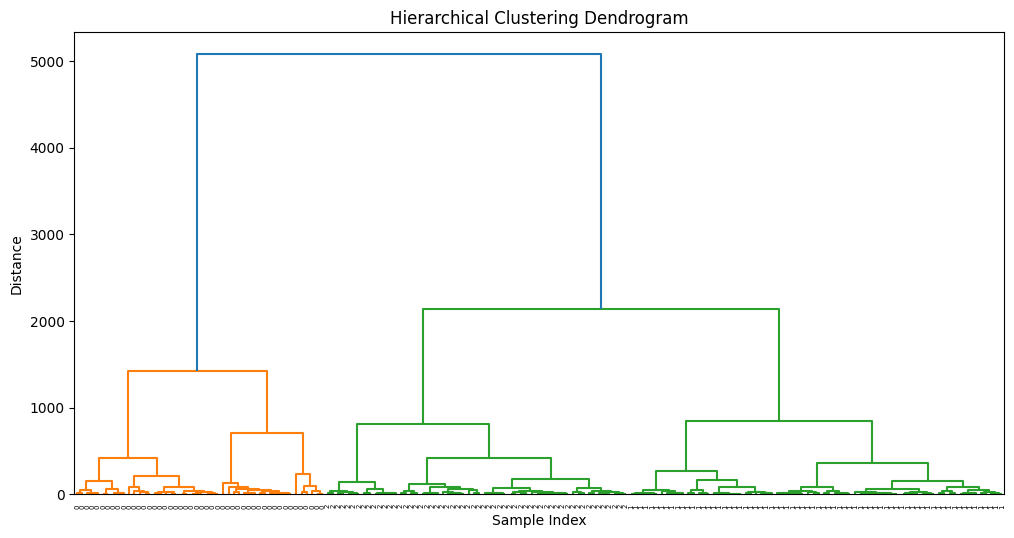

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_cluster.fit(X)
hierarchical_labels = hierarchical_cluster.labels_

print(hierarchical_labels)


# Plotting
plt.figure(figsize=(12, 6))

# 原始數據
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=numeric_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Hierarchical Clustering 結果
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()

# 計算聚類連結矩陣
Z = linkage(X, method='ward')

# 繪製 Dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=hierarchical_labels)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

在 AgglomerativeClustering 中，linkage 參數用於指定計算群集之間距離的方法。linkage 參數有幾種選擇，包括：

1. ward: 使用ward方差最小化算法。它是一種合併樹算法，尋找合併兩個群集的方式是將它們的方差增加的平方和最小化。這是默認值，通常適用於大多數情況。

2. complete: 使用最大距離作為合併標準。即尋找兩個群集中最遠兩個點之間的距離，然後將這個距離作為兩個群集之間的距離。

3. average: 使用平均距離作為合併標準。對於兩個群集，它計算所有點對之間的平均距離，然後將其視為兩個群集之間的距離。

4. single: 使用最小距離作為合併標準。即尋找兩個群集中最近兩個點之間的距離，然後將這個距離作為兩個群集之間的距離。

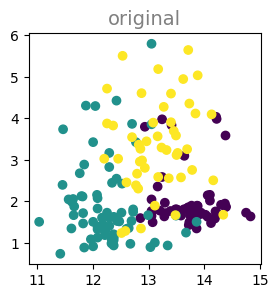

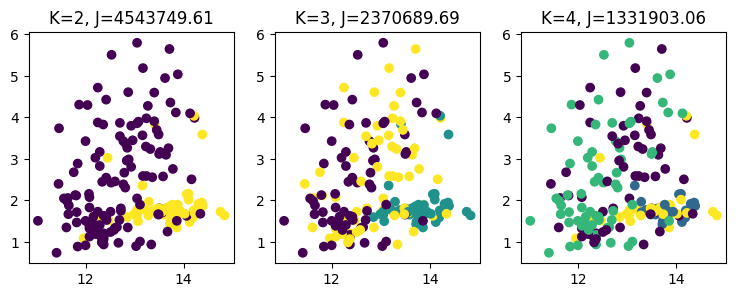

     Alcohol  Malicacid
0      14.23       1.71
1      13.20       1.78
2      13.16       2.36
3      14.37       1.95
4      13.24       2.59
..       ...        ...
173    13.71       5.65
174    13.40       3.91
175    13.27       4.28
176    13.17       2.59
177    14.13       4.10

[178 rows x 2 columns]


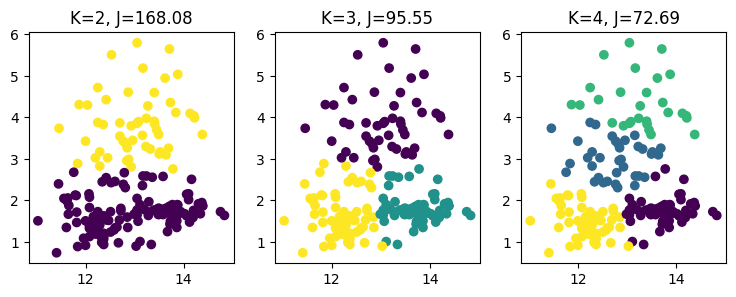

In [11]:
from sklearn import cluster

plt.figure(figsize=(3, 3))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=numeric_labels) #carray-like or list of colors or color, optional
plt.title("original", fontsize=14, color="grey")
plt.show()

def KmeansPlot(X,y,title,px_idx=0,py_idx=1):
  # plt.figure(figsize=(3, 3))
  # plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=numeric_labels) #carray-like or list of colors or color, optional
  # plt.title(title, fontsize=14, color="grey")

  km2 = cluster.KMeans(n_clusters=2, n_init=10).fit(X)
  km3 = cluster.KMeans(n_clusters=3, n_init=10).fit(X)
  km4 = cluster.KMeans(n_clusters=4, n_init=10).fit(X)

  plt.figure(figsize=(9, 3))
  plt.subplot(131)
  plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=km2.labels_)
  plt.title("K=2, J={:.2f}".format(km2.inertia_))
  #inertia_:sum of squared distances of samples to their closest cluster center

  plt.subplot(132)
  plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=km3.labels_)
  plt.title("K=3, J={:.2f}".format(km3.inertia_))

  plt.subplot(133)
  plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=km4.labels_)
  plt.title("K=4, J={:.2f}".format(km4.inertia_))
  plt.show()

# Fit all features of original data, plot by sepal Alcohol  Malicacid
KmeansPlot(X,y,'1. Fit all features of original data (x=sepal_length, y=sepal_width)')

# Fit only sepal length and width, plot by sepal Alcohol  Malicacid
X_sepal = X.iloc[:,:2]
print(X_sepal)
KmeansPlot(X_sepal,y,'2. Fit only sepal length and sepal width (x=sepal_length, y=sepal_width)')

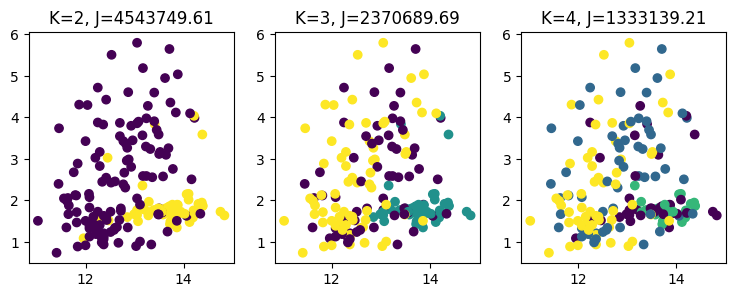

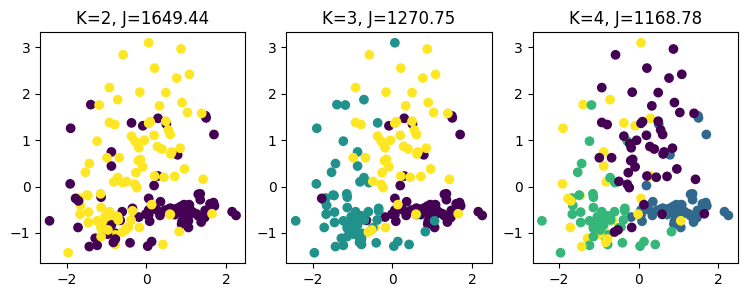

In [14]:
# Fit all features of original data, plot by sepal length and width
KmeansPlot(X,y,'Fit all features of original data (x=sepal_length, y=sepal_width)')

# X normalization
X_normal = (X-X.mean())/X.std()
KmeansPlot(X_normal,y,'Fit all features of normalized data (x=sepal_length, y=sepal_width)')
#KmeansPlot(X_normal,y,'Fit all features of normalized data (x=petal_length, y=petal_width)',2,py_idx=3)

1. Elbow Method (彎肘法)

Elbow Method 通過繪製 k 值與聚類結果的評估指標之間的關係圖，來幫助選擇最佳的 k 值。該方法的基本思想是，隨著 k 值的增加，聚類的效果（比如集群內平方和）通常會迅速下降，直到某一個 k 值後下降的速率急劇減緩，形成類似彎肘的形狀。該「彎肘點」所對應的 k 值就是最佳的聚類數量。

要使用 Elbow Method，首先需要計算每個 k 值下的聚類結果的評估指標，通常是集群內平方和（Inertia）。然後將這些值繪製成曲線圖，觀察曲線圖中是否存在明顯的「彎肘點」。

2. Average Silhouette Method (平均輪廓方法)

Average Silhouette Method 通過計算每個資料點的輪廓系數（Silhouette Coefficient），並計算所有資料點的平均輪廓系數來評估聚類的質量。輪廓系數反映了資料點與其所在集群的相似度，以及與其他集群的區分度。

Average Silhouette Method 通過計算不同 k 值下的平均輪廓系數，來幫助選擇最佳的聚類數量。通常情況下，平均輪廓系數越接近 1，表示聚類效果越好。

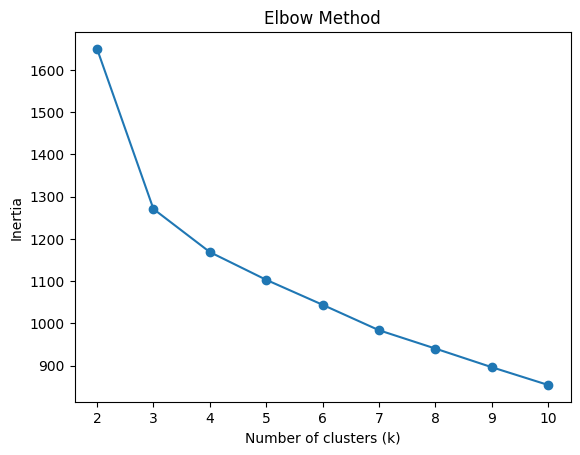

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 嘗試不同的 k 值
k_values = range(2, 11)
inertia_values = []

for k in k_values:
    # 建立 k-Means 模型
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_normal)

    # 計算集群內平方和
    inertia_values.append(kmeans.inertia_)

# 繪製 Elbow 曲線
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

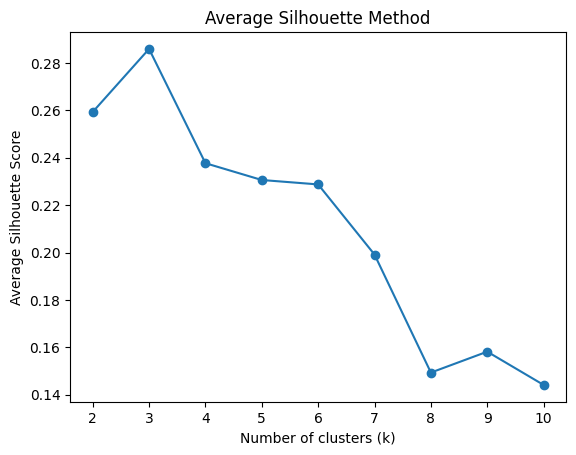

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# 嘗試不同的 k 值
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    # 建立 k-Means 模型
    kmeans = KMeans(n_clusters=k, n_init=10)
    cluster_labels = kmeans.fit_predict(X_normal)

    # 計算平均輪廓系數
    silhouette_avg = silhouette_score(X_normal, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 繪製平均輪廓系數
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Method')
plt.show()

In [18]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=1038759738ccebf0c40c8a3356c03f1cdec3d1d888adea2267f97febf9ca10fd
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [19]:
import numpy as np
import skfuzzy as fuzz

# 定義 FCM 模型參數
n_clusters = 3

print(X.T)

# 使用 FCM 模型進行訓練
centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

# 取得每個資料點的最可能所屬的群集
predicted_labels = np.argmax(u, axis=0)

print(predicted_labels)

                                  0        1        2        3       4    \
Alcohol                         14.23    13.20    13.16    14.37   13.24   
Malicacid                        1.71     1.78     2.36     1.95    2.59   
Ash                              2.43     2.14     2.67     2.50    2.87   
Alcalinity_of_ash               15.60    11.20    18.60    16.80   21.00   
Magnesium                      127.00   100.00   101.00   113.00  118.00   
Total_phenols                    2.80     2.65     2.80     3.85    2.80   
Flavanoids                       3.06     2.76     3.24     3.49    2.69   
Nonflavanoid_phenols             0.28     0.26     0.30     0.24    0.39   
Proanthocyanins                  2.29     1.28     2.81     2.18    1.82   
Color_intensity                  5.64     4.38     5.68     7.80    4.32   
Hue                              1.04     1.05     1.03     0.86    1.04   
0D280_0D315_of_diluted_wines     3.92     3.40     3.17     3.45    2.93   
Proline     

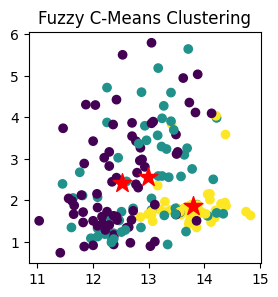

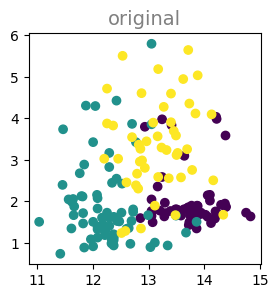

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# 繪製資料點
plt.figure(figsize=(3, 3))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predicted_labels)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.title('Fuzzy C-Means Clustering')

# 繪製群集中心
for center in centers:
    plt.scatter(center[0], center[1], marker='*', color='red', s=200)

# 原始資料分群
plt.figure(figsize=(3, 3))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=numeric_labels) #carray-like or list of colors or color, optional
plt.title("original", fontsize=14, color="grey")

plt.show()

Fuzzy C-Means（FCM）是一種軟聚類（soft clustering）方法，類似於 k-Means 算法，但允許資料點同時屬於多個群集，而不是僅屬於一個。它在概念上類似於高斯混合模型（Gaussian Mixture Models，GMM），但是更簡單和易於理解。

FCM 的主要思想是將每個資料點與每個群集中心的相似度表示為一個介於 0 和 1 之間的概率值。這些概率值通常被解釋為資料點屬於每個群集的程度，稱為隸屬度（membership degree）。FCM 的目標是最小化所有資料點的隸屬度加權的平方誤差（weighted squared error）。

以下是 FCM 算法的基本步驟：

1. 初始化: 隨機初始化每個資料點與每個群集中心的隸屬度。通常隨機初始化每個資料點對每個群集的隸屬度，使得每個資料點的隸屬度總和為 1。

2. 更新群集中心: 根據當前的隸屬度，更新每個群集的中心位置。

3. 更新隸屬度: 根據當前的群集中心，更新每個資料點對每個群集的隸屬度。

4. 收斂檢測: 重複步驟 2 和步驟 3，直到隸屬度和群集中心不再改變，或達到最大迭代次數。

5. 結果: 最後的隸屬度即為資料點屬於每個群集的程度，可以根據這些隸屬度來解釋聚類結果。

FCM 算法相對於 k-Means 和 GMM 更具有彈性，因為它可以處理更多的不確定性，並且允許資料點同時屬於多個群集。然而，它也需要更多的計算成本和更多的超參數調整。

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=2a4145f6bc4da00b176e15e6ea4c8f97659806337f322e60b0f3270c1ff33aef
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


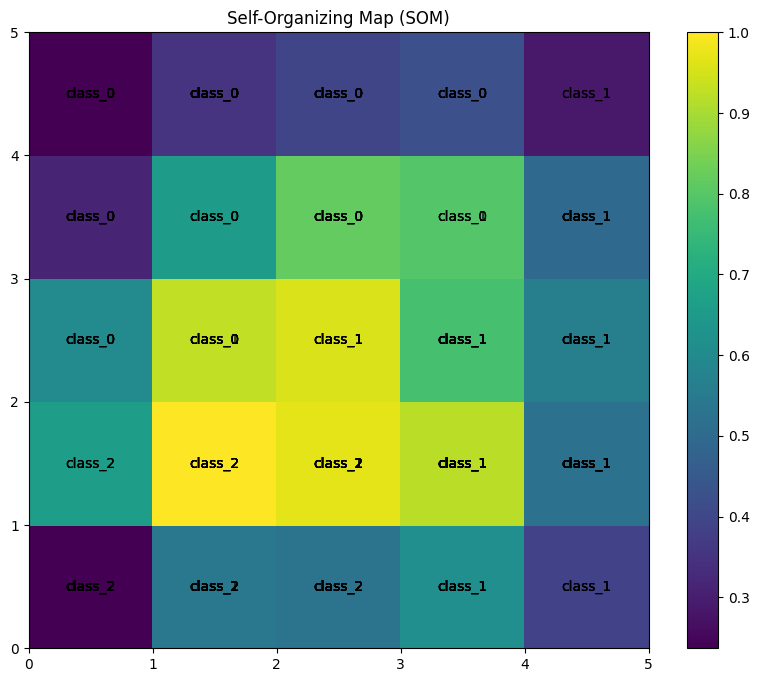

In [26]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

# Load the wine dataset
wine = load_wine()
data = wine.data
target = wine.target

# Data normalization
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Define SOM parameters
grid_rows = 5
grid_columns = 5

# Initialize SOM model
som = MiniSom(grid_rows, grid_columns, data.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize weights
som.random_weights_init(data_normalized)

# Train the SOM model on the dataset
som.train_random(data_normalized, 1000)  # Train randomly on the dataset for 1000 iterations

# Visualization
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='viridis')  # Display the distance map for each node
plt.colorbar()

target_names = wine.target_names

# Find the nearest node for each sample
winners = np.array([som.winner(x) for x in data_normalized])

for i, (x, t) in enumerate(zip(data_normalized, target)):
    plt.text(winners[i][0]+.5, winners[i][1]+.5, target_names[t], color='k', ha='center', va='center')

plt.title('Self-Organizing Map (SOM)')
plt.show()


自組織映射（Self-Organizing Maps，SOM），也稱為 Kohonen 網絡，是一種用於將高維資料映射到低維空間的無監督學習神經網絡算法。它通常用於對高維資料進行聚類、可視化和特徵提取。

SOM 的主要特點是在學習過程中，通過競爭機制，將資料點映射到網絡中的節點，同時保持資料間的拓撲關係。換句話說，相鄰的資料點在原始空間中也會在 SOM 中被映射到相鄰的節點。這使得 SOM 不僅可以用於聚類，還可以用於可視化資料分佈，並發現資料的潛在結構。

以下是 SOM 的基本思想和步驟：

1. 初始化權重向量: 將每個節點的權重向量初始化為隨機值或者從資料中隨機選取。

2. 選擇資料: 從資料集中隨機選取一個資料點。

3. 計算最相似的節點: 計算每個節點的權重向量與選定的資料點之間的距離，通常使用歐氏距離或者其他相似度度量。
4. 更新最相似的節點: 將最相似的節點（即與資料點距離最近的節點）及其鄰近節點的權重向量向資料點的方向調整，以使其更接近資料點。
5. 收斂檢測: 重複步驟 2 和步驟 4，直到網絡收斂或達到最大迭代次數。

6. 結果: 最後的權重向量即為映射後的結果，可以用於聚類、可視化或特徵提取。

SOM 算法的一個重要特點是它可以通過適當的參數設置和學習過程來保持資料間的拓撲關係，這使得它在許多應用中都表現出色，特別是在聚類和可視化方面。

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 1 2 2 2 2 1 2 1 1 2
 2 1 1 1 2 1 1 2 2 0 1 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2 1 1 2 1 2 2 1 2 1
 1 2 1 1 1 1 1 0 2 2 1 1 1 1 1 1 1 1 2 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[177 150 149 148 147 146 144 142 140 139 151 138 136 135 133 132 131 176
  83 118  61 137 152 143 154 175 174 173 172 153 170 169 168 167 166 165
 164 171 162 157 161 163 156 160 159 155 158  94  76 108  77  72  71 110
  75  79  84 105  85  86 103 102  91  96  93  69  80 111 127 113 128  97
 126 125 124 122 121 123  64 114  63 115  99 117 116 112 106 109 104 119
 120 129 130 101 134 141 100 145 107   0  95  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  20  19  18  17   1   2   3   4   5   6
   7  36   8  10  11  12  13  14  15  16   9  37  38  39  60  62  65  66
  67  68  70  59  73  78  81  82  87  89  90  92  74  

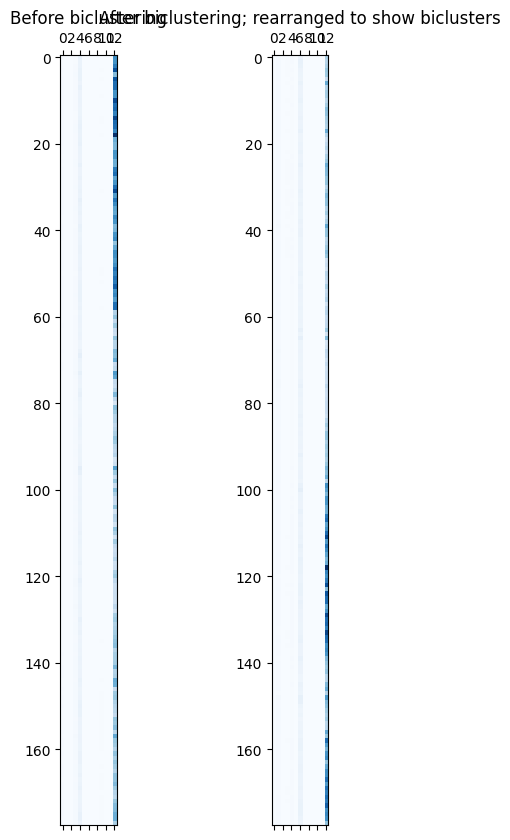

In [30]:
from sklearn.datasets import load_wine
from sklearn.cluster import SpectralCoclustering
import numpy as np

# 載入 wine 資料集
wine = load_wine()
data = wine.data  # 特徵資料

# 初始化 Spectral Co-clustering 模型
model = SpectralCoclustering(n_clusters=3, random_state=0)  # 因為 iris 資料集有 3 類

# 訓練模型
model.fit(data)

# 取得行和列的聚類結果
row_labels = model.row_labels_
column_labels = model.column_labels_

print(row_labels)

# 取得行和列的重排索引
row_order = np.argsort(row_labels)
column_order = np.argsort(column_labels)

print(np.argsort(row_labels))

# 重新排序資料
data_reordered = data[row_order]
data_reordered = data_reordered[:, column_order]

import matplotlib.pyplot as plt

# 创建包含两个子图的图像，并指定子图的布局
fig, axes = plt.subplots(1, 2, figsize=(5, 10))

# 绘制第一个子图：重排前的数据
axes[0].matshow(data, cmap=plt.cm.Blues)
axes[0].set_title("Before biclustering")

# 绘制第二个子图：重排后的数据
axes[1].matshow(data_reordered, cmap=plt.cm.Blues)
axes[1].set_title("After biclustering; rearranged to show biclusters")

# 显示图像
plt.show()

雙聚類（BiClustering），也被稱為共聚類（Coclustering）或者矩陣分解（Matrix Factorization），是一種用於同時對行和列進行聚類的無監督學習方法。它的目標是同時識別資料集中的行聚類和列聚類，從而找到資料集的子集，其中行和列具有類似的特徵。

下面是雙聚類的基本思想和步驟：

1. 初始化: 隨機初始化行和列的聚類。

2. 計算相似性: 通過計算行和列之間的相似性（例如，歐氏距離、皮爾遜相關系數等），得到一個相似性矩陣。

3. 優化聚類: 通過最大化行和列的相似性，同時最小化聚類內的變異性和聚類間的差異性，來優化聚類。這可以通過迭代地更新聚類來實現。

4. 收斂檢測: 重複步驟 2 和步驟 3，直到收斂條件滿足（例如，聚類不再改變或達到最大迭代次數）。

5. 結果: 最後得到的行和列聚類即為雙聚類的結果，可以用於進一步的分析和應用。

雙聚類算法的選擇取決於資料的特性、結構和需求。常見的雙聚類算法包括基於模型的方法（如Spectral Co-clustering）和基於非負矩陣分解的方法（如Singular Value Decomposition）。每種方法都有其優缺點，需要根據具體的應用場景來選擇。

In [27]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import numpy as np

# wine
wine = load_wine()
X = wine.data

# 初始化KMeans模型并进行聚类
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)

# 计算每个样本到其所属聚类中心的距离的平方
distances = np.min(kmeans.transform(X), axis=1)

# 计算平均平方残差分数（H）
H = np.mean(distances)
print("Mean squared residue score (H):", H)

Mean squared residue score (H): 93.0094349215321


mean squared residue score (H) 是一種用於衡量聚類質量的指標，通常用於評估叢聚分析的性能。在聚類的上下文中，殘差（residue）指的是每個資料點到其所屬聚類中心的距離的平方，mean squared residue score (H) 則是所有資料點殘差的平均值。

H 的計算方式如下：

1. 首先，對於每個資料點，計算其到所屬聚類中心的距離的平方（即殘差）。

2. 然後，將所有資料點的殘差加總起來。

3. 最後，將總殘差除以資料點的總數，得到 mean squared residue score (H)。

H 的值越小，表示資料點與其所屬聚類中心之間的距離越小，即聚類質量越好。因此，H 越小通常意味著聚類結果越好。

mean squared residue score (H) 是聚類算法性能評估的一種常用指標之一，特別是在需要衡量聚類質量時。